In [1]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.metrics import r2_score
from sklearn.base import clone
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
import warnings

matplotlib.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
SEED = 27
N_SPLITS = 5
N_REPEATS = 1

# Loading Data

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv', index_col='id')

In [4]:
train.head(10).T

id,0,1,2,3,4,5,6,7,8,9
MonsoonIntensity,5.000,6.00,6.00,3.000,5.000,5.00,8.00,6.000,5.000,4.000
TopographyDrainage,8.000,7.00,5.00,4.000,3.000,4.00,3.00,6.000,2.000,2.000
RiverManagement,5.000,4.00,6.00,6.000,2.000,1.00,1.00,5.000,8.000,3.000
Deforestation,8.000,4.00,7.00,5.000,6.000,4.00,2.00,7.000,5.000,5.000
Urbanization,6.000,8.00,3.00,4.000,4.000,2.00,3.00,5.000,4.000,8.000
ClimateChange,4.000,8.00,7.00,8.000,4.000,4.00,7.00,5.000,5.000,6.000
DamsQuality,4.000,3.00,1.00,4.000,3.000,6.00,3.00,3.000,2.000,5.000
Siltation,3.000,5.00,5.00,7.000,3.000,6.00,4.00,5.000,4.000,5.000
AgriculturalPractices,3.000,4.00,4.00,6.000,3.000,7.00,6.00,5.000,5.000,7.000
Encroachments,4.000,6.00,5.00,8.000,3.000,5.00,7.00,5.000,5.000,6.000


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


# Preprocessing
- Changing the data types as suggested [here](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499180).
- I'm also incorporating a new feature which was suggested [here](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499274).

In [6]:
for col in train.columns:
    if col != 'FloodProbability':
        train[col] = train[col].astype('uint8')
        test[col] = test[col].astype('uint8')
        
train['fsum'] = train[list(test.columns)].sum(axis=1)
test['fsum'] = test[list(test.columns)].sum(axis=1)

In [7]:
X = train.drop(columns='FloodProbability')
y = train['FloodProbability']

# Training Base Models

In [8]:
class Trainer:
    def __init__(self, model, X, y, n_splits=N_SPLITS, n_repeats=N_REPEATS):
        self.model = model
        self.X = X
        self.y = y
        self.n_splits = n_splits
        self.n_repeats = n_repeats

    def fit(self):
        skf = KFold(n_splits=self.n_splits, shuffle=True, random_state=SEED)
        
        oof_preds = np.zeros(len(X), dtype=float)
        scores = []
        for train_idx, val_idx in skf.split(self.X, self.y):
            X_train, X_val = self.X.iloc[train_idx], self.X.iloc[val_idx]
            y_train, y_val = self.y.iloc[train_idx], self.y.iloc[val_idx]
            
            y_pred = np.zeros_like(y_val, dtype=float)
            
            for i in range(self.n_repeats):
                m = clone(self.model)
                if self.n_repeats > 1:
                    m.set_params(random_state=i)
                m.fit(X_train, y_train)
                y_pred += m.predict(X_val)
                
            y_pred /= self.n_repeats
            
            score = r2_score(y_val, y_pred)
            scores.append(score)
            
            oof_preds[val_idx] = y_pred
            
        return scores, oof_preds
        
    def predict(self, X_test):
        y_pred = np.zeros(len(X_test), dtype=float)
        for i in range(self.n_repeats):
            m = clone(self.model)
            if self.n_repeats > 1:
                m.set_params(random_state=i)
            m.fit(X, y)
            y_pred += m.predict(X_test)
        y_pred /= self.n_repeats
        return y_pred

In [9]:
models = [
    CatBoostRegressor(random_state=SEED, verbose=False),
    LGBMRegressor(random_state=SEED, verbose=-1),
    GradientBoostingRegressor(random_state=SEED),
    KNeighborsRegressor(n_jobs=-1),
    XGBRegressor(random_state=SEED, n_jobs=-1),
    HistGradientBoostingRegressor(random_state=SEED),
    ExtraTreesRegressor(random_state=SEED, n_jobs=-1),
    LinearRegression(n_jobs=-1)
]

In [10]:
model_scores = {}
model_preds = {}
for model in models:

    if model.__class__.__name__ in ["KNeighborsRegressor", "LinearRegression"]:
        n_repeats = 1
    else:
        n_repeats = N_REPEATS

    scores, preds = Trainer(model, X, y, N_SPLITS, n_repeats).fit()
    model_scores[model.__class__.__name__] = scores
    model_preds[model.__class__.__name__] = preds
    print(f'{model.__class__.__name__}: {np.mean(scores):.5f} ± {np.std(scores):.5f}')

CatBoostRegressor: 0.86747 ± 0.00048
LGBMRegressor: 0.86720 ± 0.00049
GradientBoostingRegressor: 0.86604 ± 0.00050
KNeighborsRegressor: 0.82528 ± 0.00063
XGBRegressor: 0.86717 ± 0.00046
HistGradientBoostingRegressor: 0.86710 ± 0.00049
ExtraTreesRegressor: 0.86558 ± 0.00049
LinearRegression: 0.84494 ± 0.00065


# Visualizing the Results

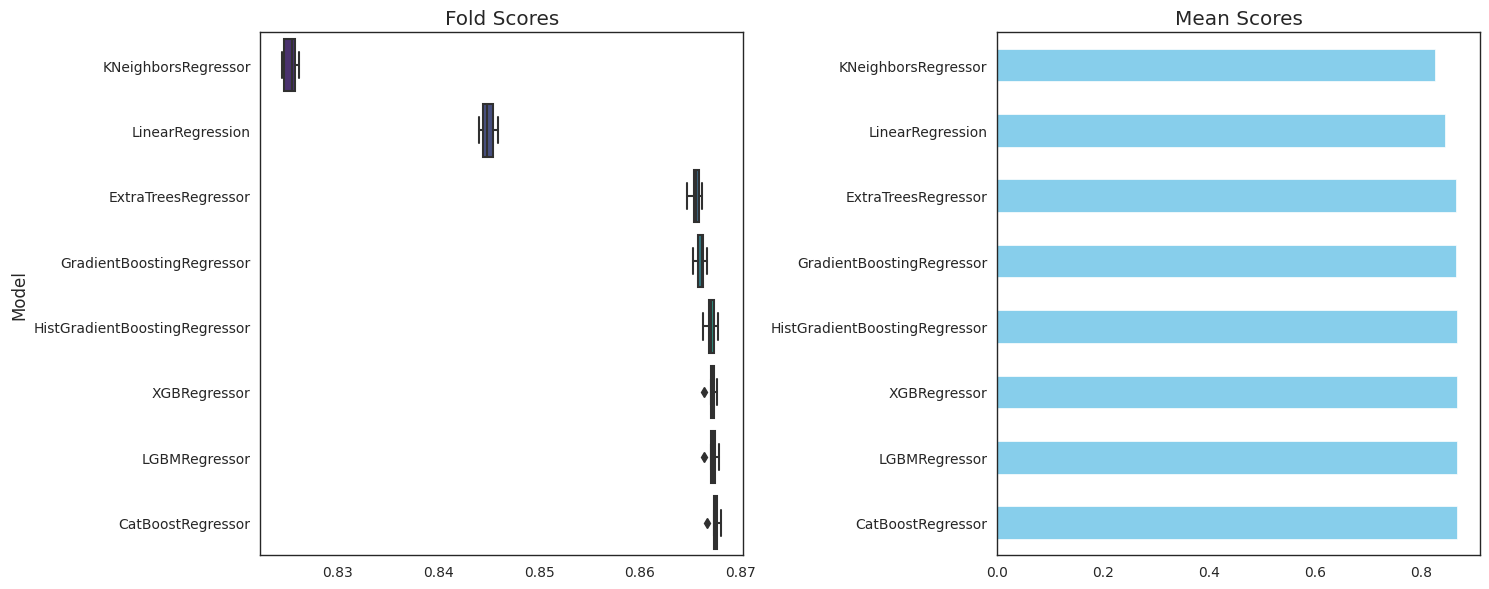

In [11]:
model_scores_df = pd.DataFrame(model_scores)

sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=model_scores_df, orient='h', palette='viridis', ax=axes[0], order=model_scores_df.mean().sort_values().index.tolist())
axes[0].set_title('Fold Scores')
axes[0].set_xlabel('')
axes[0].set_ylabel('Model')

mean_scores = model_scores_df.mean().sort_values(ascending=False)
mean_scores.plot(kind='barh', ax=axes[1], color='skyblue')
axes[1].set_title('Mean Scores')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xlim()

plt.tight_layout()
plt.show()

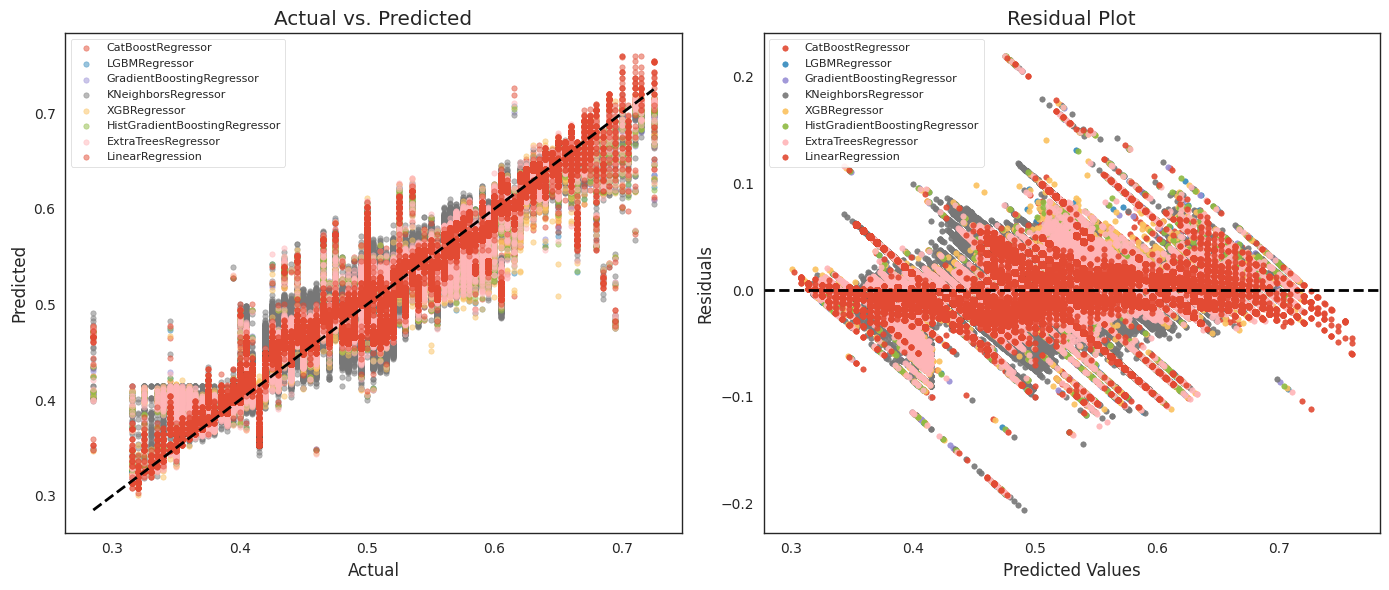

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model_pred in model_preds.items():
    axes[0].scatter(y, model_pred, alpha=0.5, s=15, label=model_name)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')
axes[0].set_title('Actual vs. Predicted')
axes[0].legend(loc='best', fontsize=8)

for model_name, model_pred in model_preds.items():
    axes[1].scatter(model_pred, y - model_pred, alpha=0.9, s=15, label=model_name)
axes[1].axhline(y=0, color='black', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()

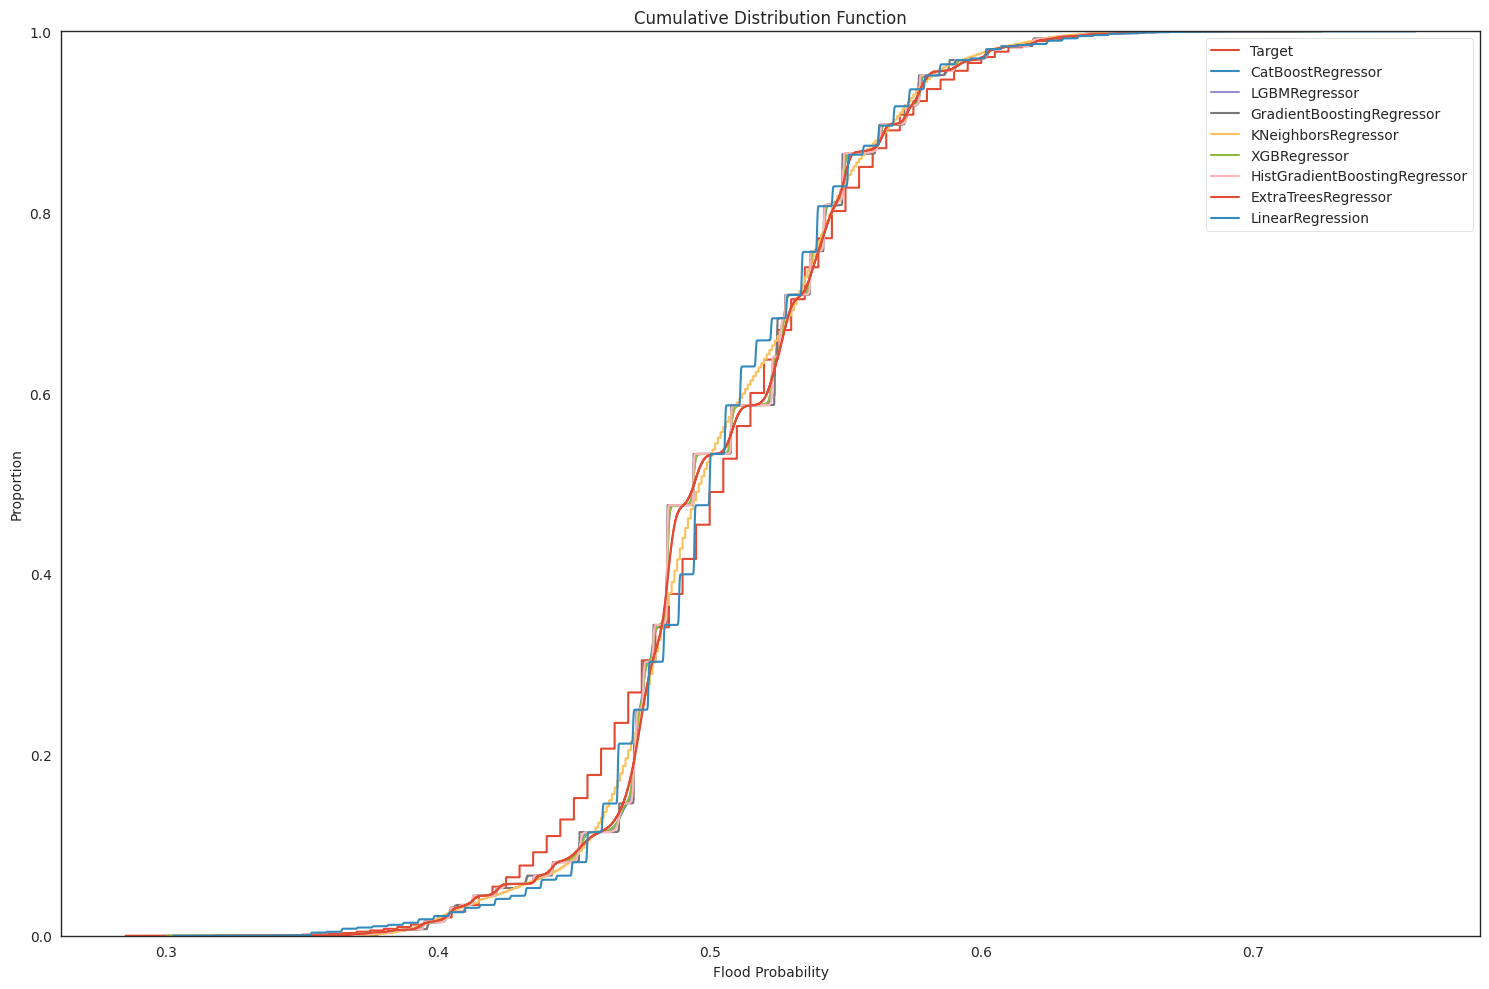

In [13]:
sns.set_style("white")
fig = plt.figure(figsize=[15, 10])

sns.ecdfplot(data=y, stat='proportion', complementary=False, label='Target')
for model, preds in model_preds.items():
    sns.ecdfplot(data=preds, stat='proportion', complementary=False, label=model)

plt.title('Cumulative Distribution Function', fontsize=12)
plt.xlabel('Flood Probability', fontsize=10)
plt.ylabel('Proportion', fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

# Retraining the Best Model and Creating a Submission File

In [14]:
best_model = CatBoostRegressor(random_state=SEED, verbose=False)
best_model.fit(X, y)
test_preds = best_model.predict(test)


submission = pd.DataFrame({'id': test.index, 'FloodProbability': test_preds})
submission.to_csv('catboost.csv', index=False)
submission.head()

,id,FloodProbability
0,1117957,0.577417
1,1117958,0.451251
2,1117959,0.449165
3,1117960,0.470661
4,1117961,0.471660
